In [183]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sb
import uproot

In [112]:
# Open all root files and create pandas dataframes of each. I couldn't figure out how to run a loop to do this quicker,
# the root directory ID was the problem. Perhaps there is a way of selecting the desired directory without using the 
# specific ID but I couldn't find a way around it.

a = uproot.open('df_1.root')[b'pandas_tree218;1']
df_1 = a.pandas.df(['JetPt', 'JetEta', 'JetPhi', 'IsLLP', 'L[xyz]'])
b = uproot.open('df_2.root')[b'pandas_tree51358']
df_2 = b.pandas.df(['JetPt', 'JetEta', 'JetPhi', 'IsLLP', 'L[xyz]'])
b = uproot.open('df_3.root')[b'pandas_tree53278;2']
df_3 = c.pandas.df(['JetPt', 'JetEta', 'JetPhi', 'IsLLP', 'L[xyz]'])
d = uproot.open('df_4.root')[b'pandas_tree52558;2']
df_4 = d.pandas.df(['JetPt', 'JetEta', 'JetPhi', 'IsLLP', 'L[xyz]'])
e = uproot.open('df_5.root')[b'pandas_tree53038;2']
df_5 = e.pandas.df(['JetPt', 'JetEta', 'JetPhi', 'IsLLP', 'L[xyz]'])
f = uproot.open('df_6.root')[b'pandas_tree54718;7']
df_6 = f.pandas.df(['JetPt', 'JetEta', 'JetPhi', 'IsLLP', 'L[xyz]'])

all_dfs = [df_1, df_2, df_3, df_4, df_5, df_6]

In [221]:
# Here I create an extra column within each dataframe, so that I can use that as the category for category plots later.

complete_dfs = [0, 0, 0, 0, 0, 0]
for i in range(6):
    ids = np.full((len(all_dfs[i]),1), 'abcdef'[i])
    i_pd = pd.DataFrame(ids, columns = ['File'])
    combined = [i_pd, all_dfs[i]]
    concat = pd.concat(combined, axis = 1)
    complete_dfs[i] = concat
all_merged = pd.concat(complete_dfs)

In [222]:
# Let's look at one of the dataframes we got from the root files.
# We can see each column represents some measurement of the simulation, which will be briefly discussed with the plots later.
# There are a total of 22576 entries in the dataframe, and 7 different measurements for each we will need for this lab.

df_1

,JetPt,JetEta,JetPhi,IsLLP,Lx,Ly,Lz
entry,,,,,,,
0,50.151355,1.767030,0.074290,True,1851.684326,178.223892,5354.035156
1,45.315016,1.088594,0.364831,False,0.000000,0.000000,0.000000
2,163.244844,1.709549,2.769850,True,609.158691,239.010056,1741.357788
3,147.121187,-0.237002,-0.393413,False,0.000000,0.000000,0.000000
4,54.661199,-0.730161,-2.550338,False,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
22571,76.296273,1.114254,-1.709045,True,259.214996,2172.912354,3113.421875
22572,53.958059,0.729737,2.172977,True,499.816559,714.238342,664.080627
22573,44.355902,-1.914020,-1.443047,False,0.000000,0.000000,0.000000


Text(0, 0.5, '# of entries')

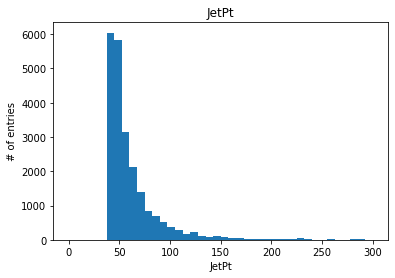

In [223]:
# A histogram of the JetPt column from df_1. 
# JetPt is the magnitude of momentum in the transverse plane (plane normal to the proton beam direction).

JetPt_a = plt.hist(df_1.loc[:, 'JetPt'], bins = 40, range = (0,300))
plt.title('JetPt')
plt.xlabel('JetPt')
plt.ylabel('# of entries')

Text(0, 0.5, '# of entries')

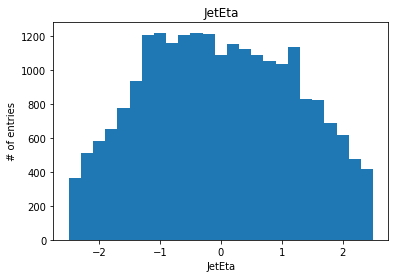

In [224]:
# JetEta is the pseudorapidity, defined as -ln(tan(theta/2)), where theta is the angle between
# the jet's momentum and the proton beam direction. Used as a spacial coordinate.
# The reason for using pseudorapidity over theta is that it is invariant under boosts, so the pseudorapidity is 
# the same in the jet frame and the observer frame.

JetEta_a = plt.hist(df_1.loc[:,'JetEta'], bins = 25)
plt.title('JetEta')
plt.xlabel('JetEta')
plt.ylabel('# of entries')

Text(0, 0.5, '# of entries')

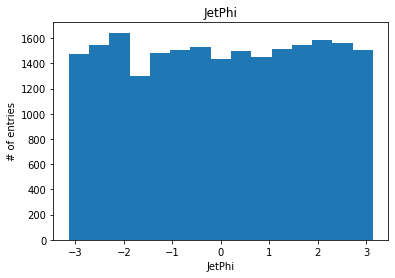

In [225]:
# JetPhi is the azimuthal angle between the momentum and the x-axis, used as a spacial coordinate.

JetPhi_a = plt.hist(df_1.loc[:,'JetPhi'], bins=15)
plt.title('JetPhi')
plt.xlabel('JetPhi')
plt.ylabel('# of entries')

Text(0, 0.5, '# of entries')

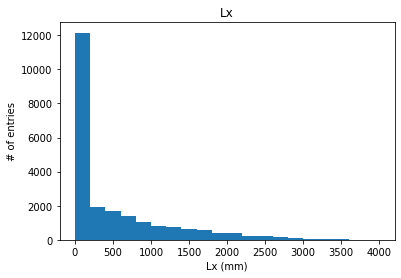

In [227]:
# Lx is the decay length (distance the LLP travels before decaying into standard model particles) in the x-direction.

Lx_a = plt.hist(df_1.loc[:,'Lx'], bins=20, range = (0,4000))
plt.title('Lx')
plt.xlabel('Lx (mm)')
plt.ylabel('# of entries')

Text(0, 0.5, '# of entries')

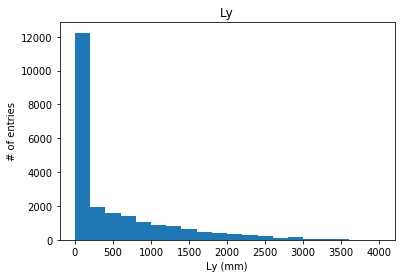

In [228]:
# Ly is the decay length in the y-direction.

Ly_a = plt.hist(df_1.loc[:,'Ly'], bins=20, range = (0,4000))
plt.title('Ly')
plt.xlabel('Ly (mm)')
plt.ylabel('# of entries')

Text(0, 0.5, '# of entries')

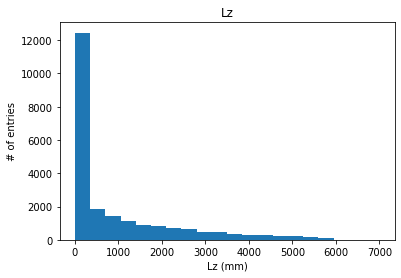

In [229]:
# Lz is the decay length in the z-direction.

Lz_a = plt.hist(df_1.loc[:,'Lz'], bins=20, range = (0,7000))
plt.title('Lz')
plt.xlabel('Lz (mm)')
plt.ylabel('# of entries')

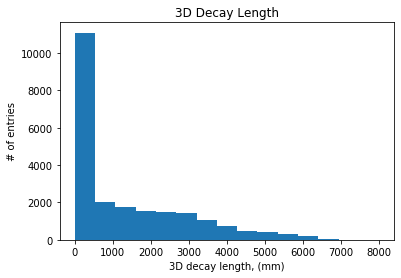

In [230]:
# 3D decay length is the total distance the LLP travels before decaying

Lx = df_1.loc[:, 'Lx'].values
Ly = df_1.loc[:, 'Ly'].values
Lz = df_1.loc[:, 'Lz'].values

L_a = np.sqrt(Lx**2 + Ly**2 + Lz**2)
plot = plt.hist(L_a, bins = 15, range = (0,8000))
plt.xlabel('3D decay length, (mm)')
plt.ylabel('# of entries')
title = plt.title('3D Decay Length')

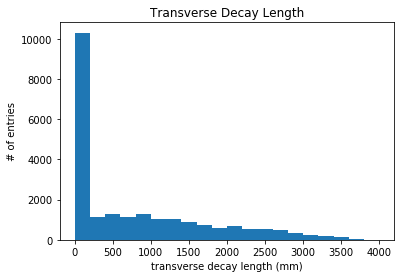

In [231]:
# L_T is the decay length projection in the xy-plane

L_T = np.sqrt(Lx**2 + Ly**2)
plot = plt.hist(L_T, bins = 20, range = (0,4000))
plt.xlabel('transverse decay length (mm)')
plt.ylabel('# of entries')
title = plt.title('Transverse Decay Length')

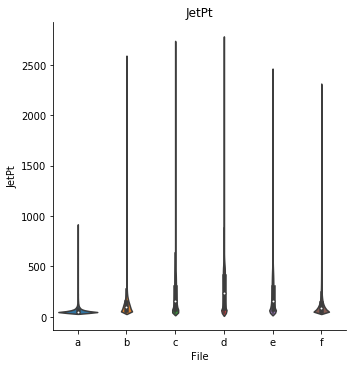

In [259]:
JetPt_all = sb.catplot(x = 'File', y = 'JetPt', data = all_merged, kind = 'violin')
title = plt.title('JetPt')

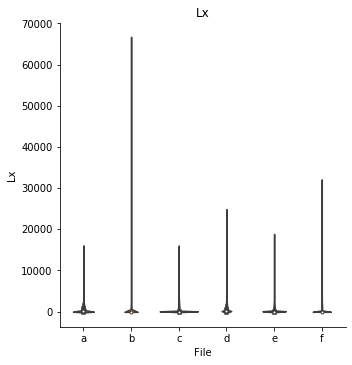

In [260]:
Lx_all = sb.catplot(x = 'File', y = 'Lx', data = all_merged, kind = 'violin')
title = plt.title('Lx')

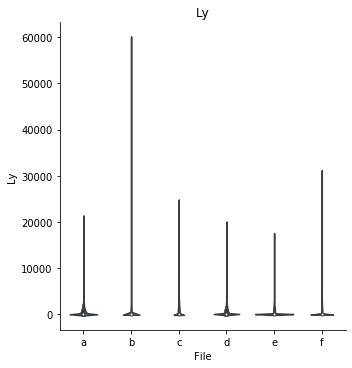

In [261]:
Ly_all = sb.catplot(x = 'File', y = 'Ly', data = all_merged, kind = 'violin')
title = plt.title('Ly')

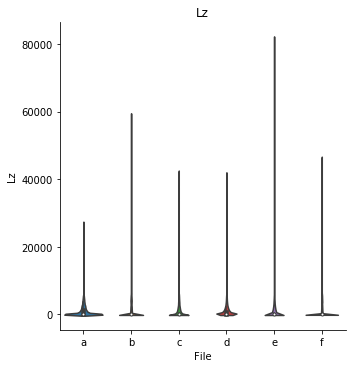

In [262]:
Lz_all = sb.catplot(x = 'File', y = 'Lz', data = all_merged, kind = 'violin')
title = plt.title('Lz')

In [250]:
# To create category plots for L_T and L I need to add new columns to the dataframe that can be called by the file.

Lx_all = all_merged.loc[:,'Lx'].values
Ly_all = all_merged.loc[:,'Ly'].values
Lz_all = all_merged.loc[:,'Lz'].values
L_T_all = np.sqrt(Lx_all**2 + Ly_all**2)
L_all = np.sqrt(Lx_all**2 + Ly_all**2 + Lz_all**2)

L_T_new = pd.DataFrame(L_T_all, columns = ['L_T'])
L_new = pd.DataFrame(L_all, columns = ['L'])
L_T_new.reset_index(drop=True, inplace=True)
L_new.reset_index(drop=True, inplace=True)
all_merged.reset_index(drop=True, inplace=True)

include_L = [all_merged, L_T_new, L_new]
data_all = pd.concat(include_L,sort = True, axis = 1)

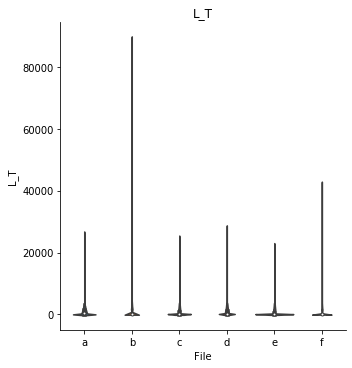

In [263]:
L_T_plot = sb.catplot(x = 'File', y = 'L_T', data = data_all, kind = 'violin')
title = plt.title('L_T')

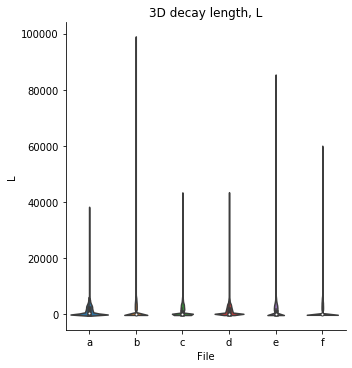

In [264]:
L_plot = sb.catplot(x = 'File', y = 'L', data = data_all, kind = 'violin')
title = plt.title('3D decay length, L')

In [271]:
# To compare the data of LLP and non-LLP jets, split the data by IsLLP

LLP_true = data_all[(data_all['IsLLP']==True)]
LLP_false = data_all[(data_all['IsLLP']==False)]

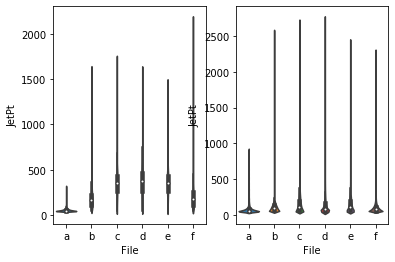

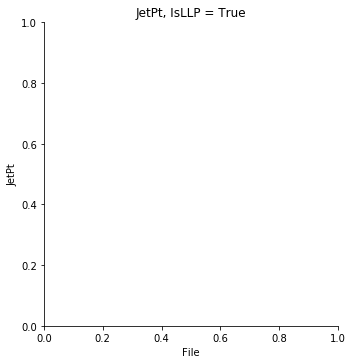

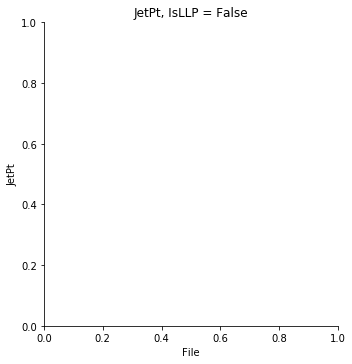

In [285]:
fig, ax =plt.subplots(1,2)
fig1 = sb.catplot(x = 'File', y = 'JetPt', data = LLP_true, kind = 'violin', ax = ax[0])
title1 = plt.title('JetPt, IsLLP = True')

fig2 = sb.catplot(x = 'File', y = 'JetPt', data = LLP_false, kind = 'violin', ax = ax[1])
title2 = plt.title('JetPt, IsLLP = False')

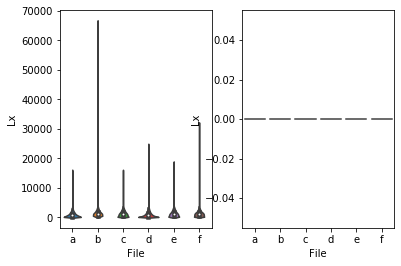

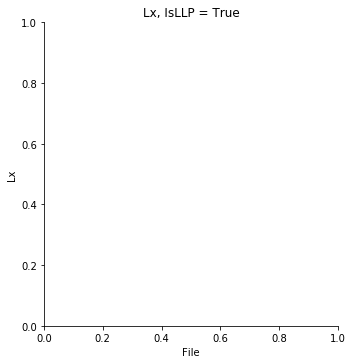

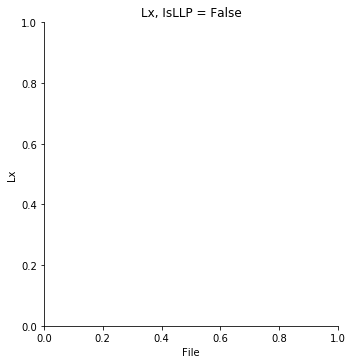

In [287]:
fig, ax =plt.subplots(1,2)
fig1 = sb.catplot(x = 'File', y = 'Lx', data = LLP_true, kind = 'violin', ax = ax[0])
title1 = plt.title('Lx, IsLLP = True')

fig2 = sb.catplot(x = 'File', y = 'Lx', data = LLP_false, kind = 'violin', ax = ax[1])
title2 = plt.title('Lx, IsLLP = False')

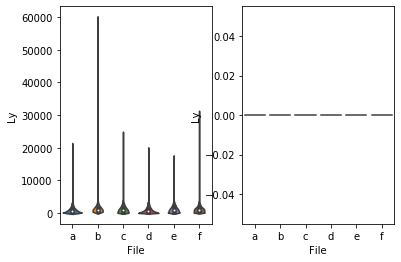

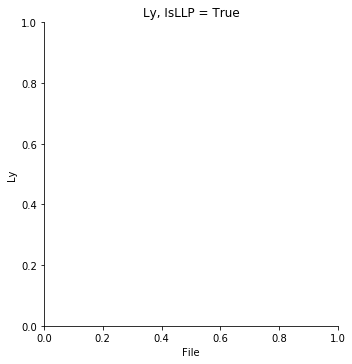

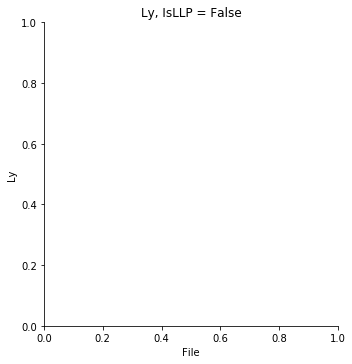

In [288]:
fig, ax =plt.subplots(1,2)
fig1 = sb.catplot(x = 'File', y = 'Ly', data = LLP_true, kind = 'violin', ax = ax[0])
title1 = plt.title('Ly, IsLLP = True')

fig2 = sb.catplot(x = 'File', y = 'Ly', data = LLP_false, kind = 'violin', ax = ax[1])
title2 = plt.title('Ly, IsLLP = False')

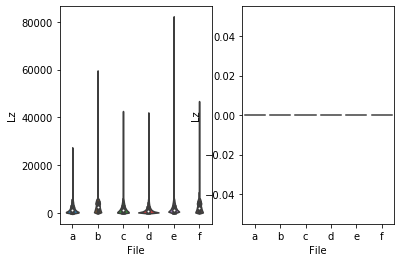

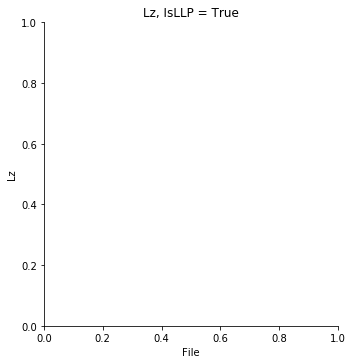

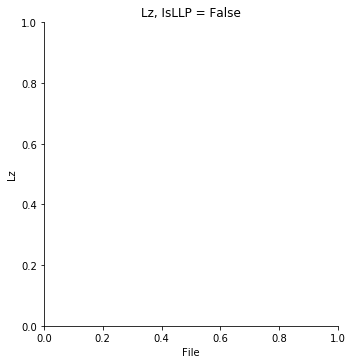

In [289]:
fig, ax =plt.subplots(1,2)
fig1 = sb.catplot(x = 'File', y = 'Lz', data = LLP_true, kind = 'violin', ax = ax[0])
title1 = plt.title('Lz, IsLLP = True')

fig2 = sb.catplot(x = 'File', y = 'Lz', data = LLP_false, kind = 'violin', ax = ax[1])
title2 = plt.title('Lz, IsLLP = False')

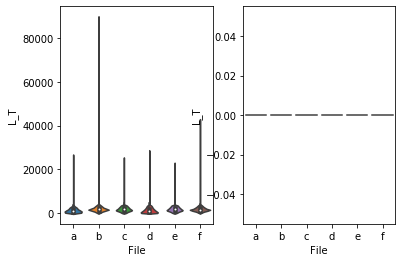

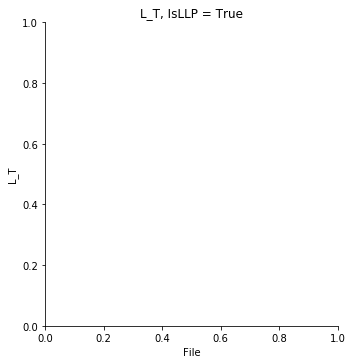

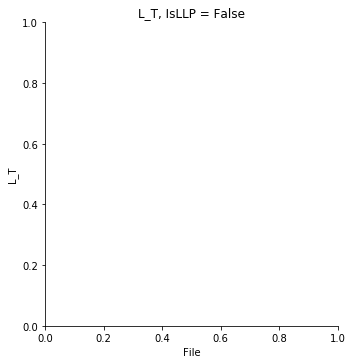

In [290]:
fig, ax =plt.subplots(1,2)
fig1 = sb.catplot(x = 'File', y = 'L_T', data = LLP_true, kind = 'violin', ax = ax[0])
title1 = plt.title('L_T, IsLLP = True')

fig2 = sb.catplot(x = 'File', y = 'L_T', data = LLP_false, kind = 'violin', ax = ax[1])
title2 = plt.title('L_T, IsLLP = False')

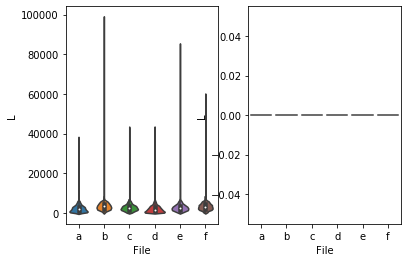

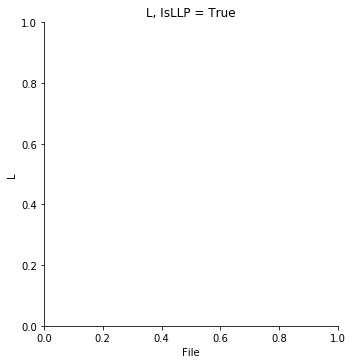

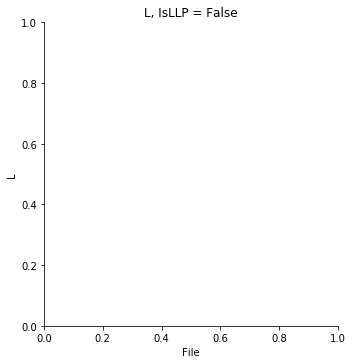

In [291]:
fig, ax =plt.subplots(1,2)
fig1 = sb.catplot(x = 'File', y = 'L', data = LLP_true, kind = 'violin', ax = ax[0])
title1 = plt.title('L, IsLLP = True')

fig2 = sb.catplot(x = 'File', y = 'L', data = LLP_false, kind = 'violin', ax = ax[1])
title2 = plt.title('L, IsLLP = False')

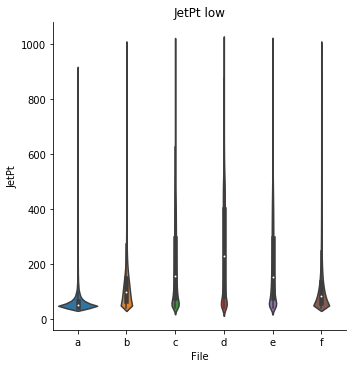

In [308]:
JetPt_low = data_all[data_all['JetPt']<=1000]
JetPt_mid = data_all[(1000<=data_all['JetPt']) | (data_all['JetPt']<=2000)]
JetPt_high = data_all[data_all['JetPt']<=2000]

fig1 = sb.catplot(x = 'File', y = 'JetPt', data = JetPt_low, kind = 'violin')
title1 = plt.title('JetPt low')

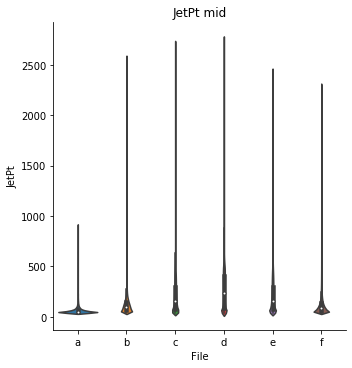

In [310]:
fig2 = sb.catplot(x = 'File', y = 'JetPt', data = JetPt_mid, kind = 'violin')
title2 = plt.title('JetPt mid')

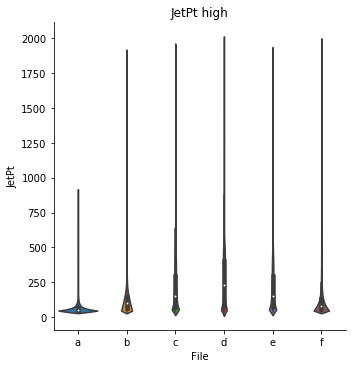

In [311]:
fig3 = sb.catplot(x = 'File', y = 'JetPt', data = JetPt_high, kind = 'violin')
title3 = plt.title('JetPt high')